In [ ]:
import pandas as pd

# Load the dataset from your local path (if using Colab, upload the file first)
data = pd.read_csv('housing.csv')  # Replace with the correct file path

# Check the first few rows to confirm the data is loaded correctly
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('housing.csv')  # Replace with your file path

# Check the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housing_median_age     

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing numerical values with the median
imputer = SimpleImputer(strategy='median')
data_imputed = data.copy()
data_imputed[data_imputed.select_dtypes(include=['float64']).columns] = imputer.fit_transform(data_imputed.select_dtypes(include=['float64']))

# Impute missing categorical values (if any) with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
data_imputed[data_imputed.select_dtypes(include=['object']).columns] = imputer_cat.fit_transform(data_imputed.select_dtypes(include=['object']))

# Check the data after imputation
print(data_imputed.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_imputed)

# Separate features and target
X = data_encoded.drop('median_house_value', axis=1)  # Assuming 'median_house_value' is the target
y = data_encoded['median_house_value']

# Check the shape of features and target
print(X.shape, y.shape)


(20640, 13) (20640,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but recommended for many algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data
print(X_train_scaled.shape, X_test_scaled.shape)


(16512, 13) (4128, 13)


In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 50670.73824097191
Root Mean Squared Error: 70060.52184473518
R-squared: 0.6254240620553606


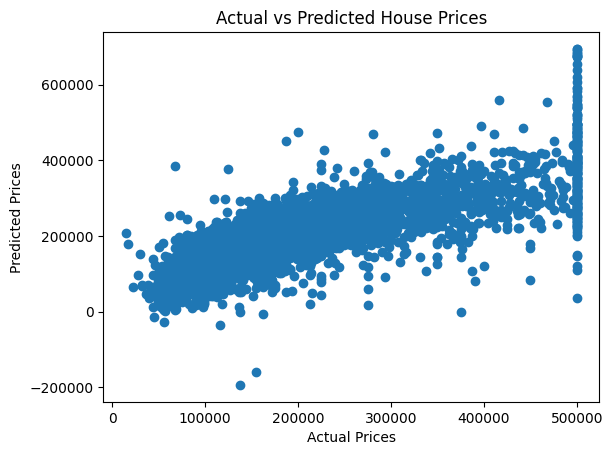

In [ ]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


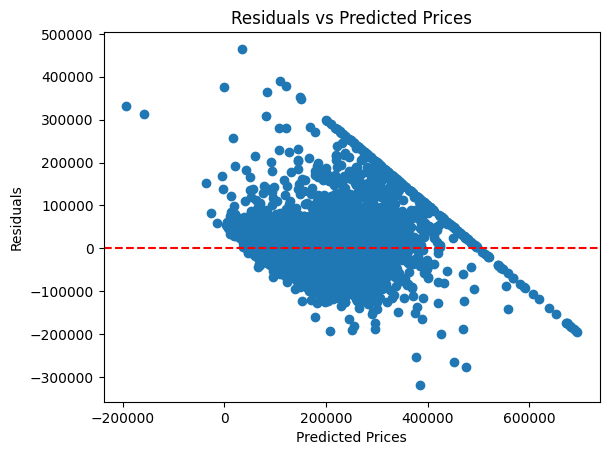

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


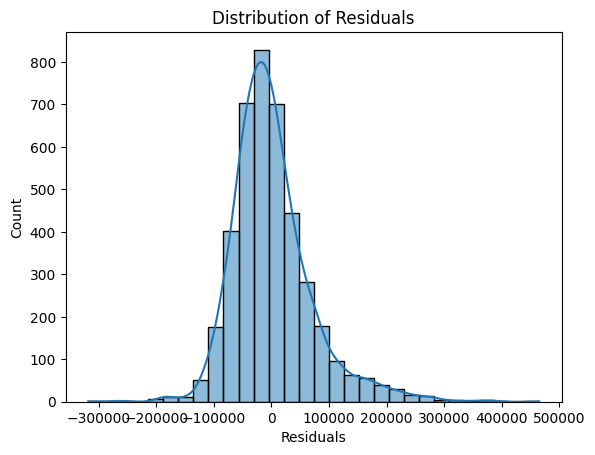

In [ ]:
import seaborn as sns

# Plot residuals distribution
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
import numpy as np

# Convert to NumPy arrays
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Sort values for better visualization
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_y_pred = y_pred_array[sorted_indices]

# Line plot
plt.plot(sorted_y_test, label='Actual Prices', color='blue', linewidth=2)  # Thicker line for actual prices
plt.plot(sorted_y_pred, label='Predicted Prices', linestyle='--', color='orange', alpha=0.7)  # Transparent predicted line
plt.xlabel('Data Points')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted Prices (Line Plot)')
plt.legend()
plt.show()
plt.plot(sorted_y_test, label='Actual Prices')
plt.plot(sorted_y_pred, label='Predicted Prices', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted Prices (Line Plot)')
plt.legend()
plt.show()


NameError: name 'y_test' is not defined